In [15]:
#Step 1: remove " : " and " - " characters and store in a new file using reg ex
import re
from sklearn import svm,datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
f1 = open('dataset1.txt','w',encoding='UTF-8')
with open ('dataset_medical_chatbot.txt','r',encoding='UTF-8') as myfile:
    s=myfile.read()
    s = re.sub(r'[:]', '', s)
    s = re.sub(r'[-]', '', s)
    f1.write(s)
f1.close()

#Step 2: Using nltk remove digits and punctuations and store each line in a list
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import string
def text_process(text):    
    stemmer = WordNetLemmatizer()
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    return [stemmer.lemmatize(word) for word in nopunc]
dataset=[]
with open('dataset1.txt', 'r') as file:
    for line in file:
        array=[]
        array = text_process(line)
        X=''
        for i in range(0,len(array)-1):
                X+=array[i]+''
        dataset.append(X)
dataset= np.asarray(dataset)

import numpy as np
from sklearn.model_selection import train_test_split

#Step 3: Divide dataset into questions (user query) and answers (from chatbot)
Y=[]
X=[]
for i in range(0,len(dataset)):
    if(dataset[i].split(" ")[0]=='user'):
        X.append(dataset[i])
    elif(dataset[i].split(" ")[0]=='chatbot'):
            Y.append(dataset[i])
question=np.asarray(X)
answer=np.asarray(Y)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


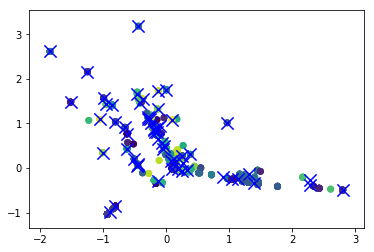

In [16]:
#Step 4: Do a train test split for both the questions and answers
x_train,x_test=train_test_split(question,test_size=0.33,shuffle=False)
answer_train,answer_test=train_test_split(answer,test_size=0.33, shuffle=False)

#Step 5: use CountVectorizer to convert the strings into a word count
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
model = CountVectorizer()
model.fit(x_train)
features = model.transform(x_train)
 
#Step 6: Use K means clustering algorithm with 60 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=60, n_init=100, init="k-means++")
km.fit(features)
km.predict(features)
labels=km.labels_

#Step 7: visualization of the graph for the algorithm
pca = PCA (n_components=60)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(km.cluster_centers_)
import matplotlib.pyplot as plt
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [17]:
#Step 8: Homogeneity Score
from sklearn.metrics import homogeneity_score
print(homogeneity_score(x_train, km.predict(features)))



0.7387425470526271


In [18]:
#Step 9: To check if a sample from training set and same sample from test set gives the same cluster index

#Compute cluster centers and predict cluster index for each sample.
train_cluster=km.fit_predict(model.transform(x_train))

#By trial and error check which index has same user query in x_train and x_test
print(x_train[2])
print(train_cluster[2])

#Predict the closest cluster each sample in X belongs to.
test_cluster=km.predict(model.transform(x_test))

print(x_test[0])
print(test_cluster[0]) 

user  i live in Kolkata
4
user  my age is 
3


In [19]:
#Step 10: To check for some new data
lines_to_predict=['user  I live in hyderabad']
cluster_predicted=km.predict(model.transform(lines_to_predict))
print(cluster_predicted)



[4]
